# |This notebook contains data preprocessing

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm.auto import tqdm

In [22]:
sns.set()
%matplotlib inline

# Load data

In [23]:
df = pd.read_csv('data/data.csv', sep=';')
df.head()

,Дата,Регион,Заражений,Выздоровлений,Смертей,Смертей за день,Заражений за день,Выздоровлений за день
0,12.03.2020,Адыгея,0,0,0,0,0,0
1,12.03.2020,Алтайский край,0,0,0,0,0,0
2,12.03.2020,Амурская обл.,0,0,0,0,0,0
3,12.03.2020,Архангельская обл.,0,0,0,0,0,0
4,12.03.2020,Астраханская обл.,0,0,0,0,0,0


In [24]:
df.columns = ['date', 'region', 'total_infected', 'total_recovered', 'total_dead', 'deaths_per_day', 'infected_per_day', 'recovered_per_day']
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')

df['infected'] = df['total_infected'] - df['total_recovered'] - df['total_dead']

In [25]:
df = df[df.region == 'Москва'].reset_index()
#df = df.groupby('date').sum().reset_index()

In [26]:
df.head()

,index,date,region,total_infected,total_recovered,total_dead,deaths_per_day,infected_per_day,recovered_per_day,infected
0,40,2020-03-12,Москва,21,0,0,0,21,0,21
1,122,2020-03-13,Москва,26,0,0,0,5,0,26
2,204,2020-03-14,Москва,35,0,0,0,9,0,35
3,286,2020-03-15,Москва,35,1,0,0,0,1,34
4,368,2020-03-16,Москва,53,1,0,0,18,0,52


In [27]:
df = df.drop(columns=['index', 'region'])
df.index = df.date

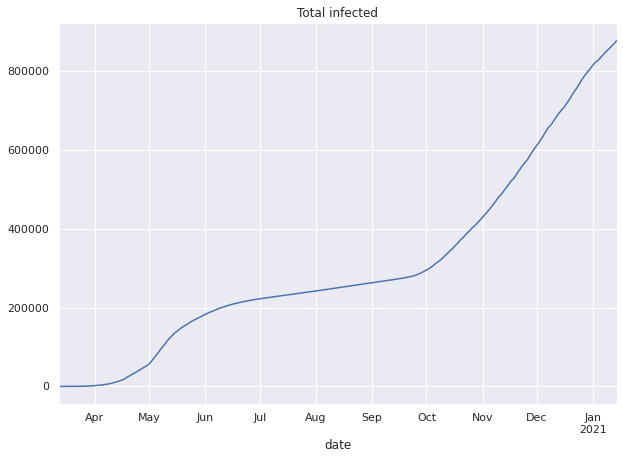

In [28]:
plt.figure(figsize=(10,7))
df.total_infected.plot()
plt.title("Total infected")
plt.show()

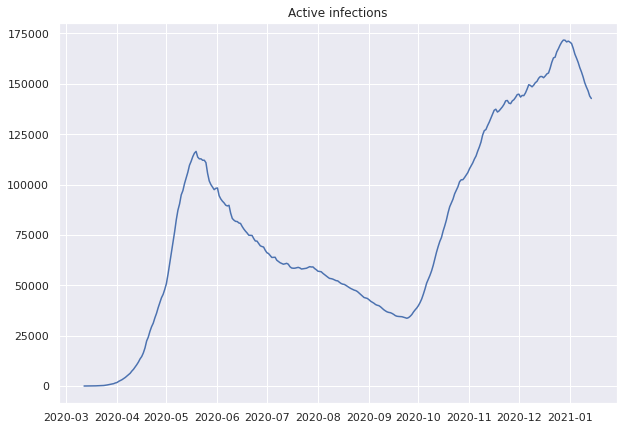

In [29]:
plt.figure(figsize=(10,7))
plt.plot(df.date, df.infected)
plt.title("Active infections")
plt.show()

In [9]:
df_smoothed = df.rolling(7).mean().round(2)
df_smoothed.columns = [col + '_ma7' for col in df_smoothed.columns]
df_smoothed.head(10)

,total_infected_ma7,total_recovered_ma7,total_dead_ma7,deaths_per_day_ma7,infected_per_day_ma7,recovered_per_day_ma7,infected_ma7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,44.43,0.57,0.0,0.0,12.29,0.14,43.86
7,55.43,0.71,0.0,0.0,11.00,0.14,54.71
8,70.43,1.43,0.0,0.0,15.00,0.71,69.00
9,85.00,2.57,0.0,0.0,14.57,1.14,82.43


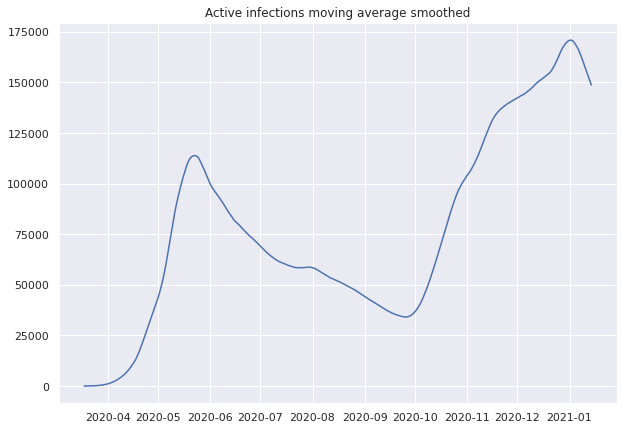

In [10]:
plt.figure(figsize=(10,7))
plt.plot(df.date, df_smoothed.infected_ma7)
plt.title("Active infections moving average smoothed")
plt.show()

In [11]:
full_df = pd.concat([df, df_smoothed], axis=1)
full_df.head()

,date,total_infected,total_recovered,total_dead,deaths_per_day,infected_per_day,recovered_per_day,infected,total_infected_ma7,total_recovered_ma7,total_dead_ma7,deaths_per_day_ma7,infected_per_day_ma7,recovered_per_day_ma7,infected_ma7
0,2020-03-12,21,0,0,0,21,0,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-13,26,0,0,0,5,0,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-14,35,0,0,0,9,0,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-15,35,1,0,0,0,1,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-16,53,1,0,0,18,0,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
full_df.to_csv('data/moscow_prepared.csv', index=False)

In [39]:
full_df.date

0     2020-03-12
1     2020-03-13
2     2020-03-14
3     2020-03-15
4     2020-03-16
         ...    
304   2021-01-10
305   2021-01-11
306   2021-01-12
307   2021-01-13
308   2021-01-14
Name: date, Length: 309, dtype: datetime64[ns]